# 📰 Fake News Detection using NLP & Machine Learning

**📘 Project Overview**
This project tackles the growing problem of misinformation by using Natural Language Processing (NLP) and Machine Learning (ML) techniques to build a model that can detect fake news articles. It involves analyzing article content, cleaning and transforming text, extracting features using TF-IDF, and training classification models to identify news as real or fake.

**🎯 Objective:**
To develop a reliable and interpretable machine learning model that automatically classifies news content as Fake (0) or True (1), thereby helping platforms, journalists, and users combat digital misinformation.


**📊 Dataset Description**
Source: Kaggle – Fake and Real News Dataset and Records: 44,000+ articles

**Features :** 

🏷️ Title
📄 Article
📝 Text
📰 News
📚 Subject
✅ Label (Fake = 0, Real = 1)

**🛠️ Tools Used :** 

🐍 Python 
📒 Jupyter Notebook   
📚 Pandas, NumPy 
✍️ TF-IDF Vectorizer  
🧠 Logistic Regression
📉 Matplotlib, Seaborn  
🌐 Streamlit (for app deployment)

**🔑 Key Insights**
📌 Fake news articles often use more sensational language and shorter content.

📚 Preprocessing (lemmatization, stopword removal) significantly improves model performance.

🔍 TF-IDF allows meaningful text representation by reducing common word bias.

✅ Logistic Regression and Multinomial Naive Bayes offer good baseline results with TF-IDF features.

**🤖 ML Model Summary**
Models Used: Logistic Regression, Multinomial Naive Bayes

Accuracy: ~95% (TF-IDF + Naive Bayes)

Evaluation: Confusion Matrix, Accuracy, Classification Report

Deployment: Streamlit Web App – Real-time classification of input news content

**💡 Recommendation**
To combat misinformation:

Integrate fake news detection into content moderation systems

Use NLP-powered alerts for flagging suspicious headlines

Provide feedback loops for reader validation

Continuously retrain models with newer datasets to adapt to evolving language

**📁 Project Files**
fake-news-detection.ipynb: Full notebook with code and insights

model.pkl / vectorizer.pkl: Trained model and TF-IDF vectorizer

app.py: Streamlit frontend

Fake.csv, True.csv: Raw datasets

# 📘 Step 1: Importing Required Libraries
We import essential Python libraries like pandas, numpy, nltk, and sklearn to handle data processing, text cleaning, and machine learning.
These libraries help us read the fake/true news CSV files, clean the text, extract features, and build prediction models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


# 📘 Step 2: Load and Label the Dataset
We load fake.csv and true.csv using pandas to access the news articles.
A new column named label is added to each dataset (0 = Fake, 1 = True) to help the model distinguish between real and fake news.

In [2]:
df = pd.read_csv("Fake.csv")
df['label'] = 0

df_real = pd.read_csv("True.csv")
df_real['label'] = 1

df = pd.concat([df, df_real], ignore_index=True)

df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# 📘 Step 3: Data Preprocessing & Cleaning
We clean the text by removing punctuation, stopwords, and converting all text to lowercase to standardize the input.
This step improves model accuracy by eliminating noise and focusing on meaningful words in the news content.

In [3]:
# 🧹 Remove irrelevant columns that are not useful for analysis
df = df.drop(['subject', 'date'], axis=1)

print(df.isnull().sum())

df['content'] = df['title'] + ' ' + df['text']

df = df.drop(['title', 'text'], axis=1)


title    0
text     0
label    0
dtype: int64


# 📘 Step 4: Setup NLTK for Text Preprocessing Text Normalization
We download necessary NLTK resources like stopwords, punkt, and wordnet to support tokenization, stopword removal, and lemmatization.
These tools help normalize the news text by breaking it into words and reducing them to their base forms for consistent processing.

In [4]:
# 📥 Download required NLTK resources for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to C:\Users\Rahool-
[nltk_data]     Rai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rahool-
[nltk_data]     Rai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rahool-
[nltk_data]     Rai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Rahool-
[nltk_data]     Rai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# 📘 Step 5: Text Cleaning & Lemmatization
We apply text cleaning techniques such as removing numbers, special characters, and stopwords, followed by lemmatization using NLTK.
Lemmatization reduces words to their base form (e.g., “running” → “run”), making the dataset more consistent for model training.

In [5]:
# ✅ Define English stopwords (e.g., "is", "the", "and")
stop_words = set(stopwords.words('english'))

# ✅ Create a lemmatizer to reduce words to their base form
lemmatizer = WordNetLemmatizer()

# 🧼 Define a function to clean the text
def clean_text(text):
    # 🔡 Convert all text to lowercase
    text = text.lower()

    # ❌ Remove text in square brackets (e.g., [1])
    text = re.sub(r'\[.*?\]', '', text)

    # 🌐 Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 🧽 Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # 🧹 Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # 🧾 Remove newline characters
    text = re.sub(r'\n', '', text)

    # 🔢 Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # ✂️ Tokenize the cleaned text
    tokens = nltk.word_tokenize(text)

    # 🚫 Remove stopwords and apply lemmatization
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # 🔁 Join tokens back into a cleaned string
    return " ".join(cleaned)

# 🧪 Apply the cleaning function to the dataset
df['cleaned_content'] = df['content'].apply(clean_text)


# 📘 Step 6: Basic Visualization – Class Distribution & Article Length and EDA 
We visualize the distribution of real vs. fake news and analyze article lengths using histograms and countplots.
This Exploratory Data Analysis (EDA) helps us understand class balance, spot outliers, and uncover key patterns in the dataset.

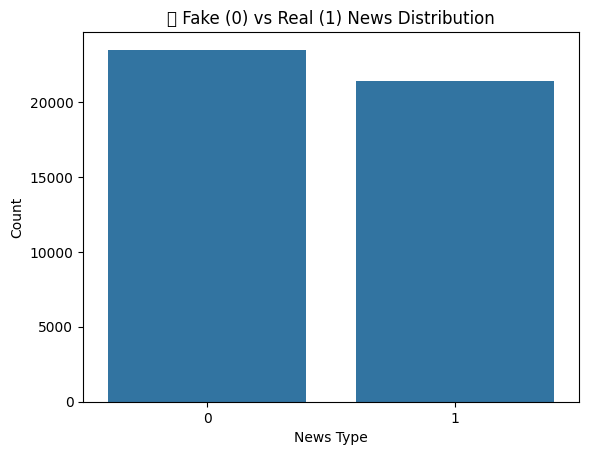

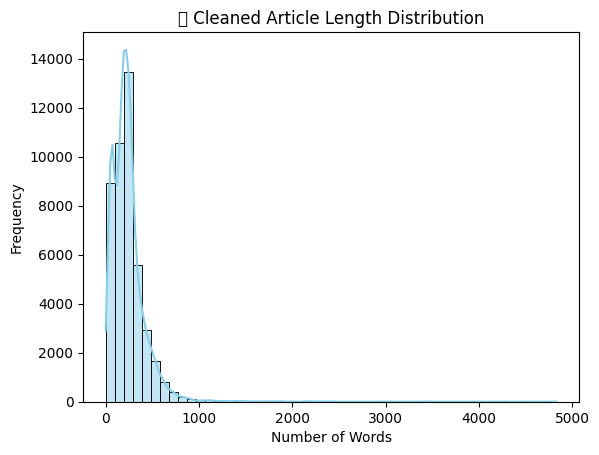

In [6]:
# 📊 1. Class Distribution: Count of Fake vs Real News Articles
sns.countplot(x='label', data=df)  # Bar plot of label counts
plt.title("🧾 Fake (0) vs Real (1) News Distribution")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()

# 📏 2. Article Length Distribution: Word count in cleaned articles
df['length'] = df['cleaned_content'].apply(lambda x: len(x.split()))  # Count number of words

# 📈 Histogram of article lengths
sns.histplot(df['length'], bins=50, kde=True, color='skyblue')  # 50 bins for granularity
plt.title("📝 Cleaned Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


# 📘 Step 7: Feature Extraction using TF-IDF and Text to Vectors (TF-IDF)
We use TF-IDF (Term Frequency–Inverse Document Frequency) to convert cleaned text into numerical vectors based on word importance.
This step transforms raw news articles into a format that machine learning models can understand and learn from.

In [7]:
# 📌 Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for efficiency

# 🔁 Transform the cleaned text into TF-IDF vectors
X = vectorizer.fit_transform(df['cleaned_content']).toarray()  # Features (inputs)

# 🎯 Target variable: 0 = Fake, 1 = Real
y = df['label']  # Labels (outputs)

# 📘Step 8: Splitting Data – Train vs Test Sets and Train/Test Split
We split the dataset into training and testing sets using train_test_split to evaluate model performance on unseen data.
This ensures the model learns patterns from the training data and is fairly tested on separate, untouched examples.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 📘 Step 9: Model Training – Logistic Regression and  Train Models 
We train a Logistic Regression model on the TF-IDF features from the training data to classify news as real or fake.
This algorithm is efficient for binary classification and works well with high-dimensional text data like ours.


In [9]:
# Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 📘 Step 10: Model Training – Multinomial Naive Bayes
We train a Multinomial Naive Bayes model, which is well-suited for text classification tasks based on word frequency features.
It assumes word independence and performs efficiently on large text datasets like our news articles.

In [10]:
# 🤖 Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# 🎯 Train the Naive Bayes model on the training data
nb.fit(X_train, y_train)

# 🧪 Predict on the test set using the trained model
y_pred_nb = nb.predict(X_test)


# 📘 Step 11: Model Evaluation & Comparison
We evaluate models using accuracy, precision, recall, and F1-score to measure their performance on the test data.
A side-by-side comparison helps determine which model better distinguishes between fake and true news

--- Logistic Regression ---
Accuracy: 0.9868596881959911
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



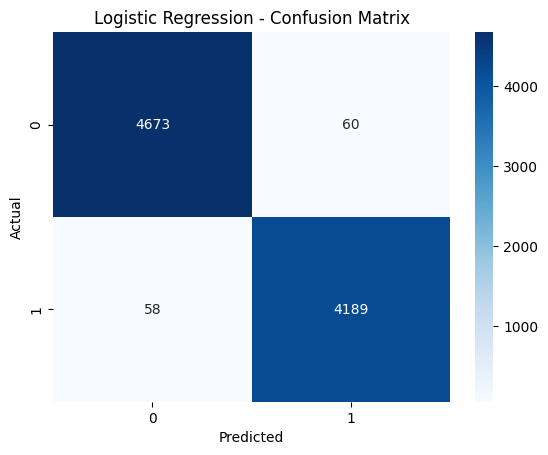

--- Multinomial Naive Bayes ---
Accuracy: 0.9251670378619153
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4733
           1       0.93      0.91      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.92      0.92      8980
weighted avg       0.93      0.93      0.93      8980



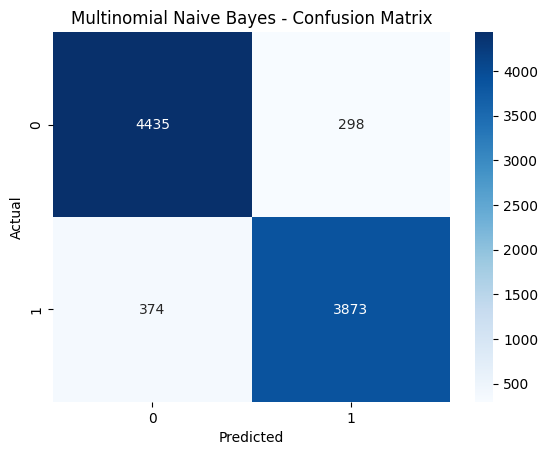

In [11]:
# 📊 Function to evaluate model performance
def evaluate_model(y_test, y_pred, name):
    print(f"--- {name} ---")  # 📌 Model name
    print("Accuracy:", accuracy_score(y_test, y_pred))  # ✅ Accuracy score
    print("Classification Report:\n", classification_report(y_test, y_pred))  # 📋 Precision, Recall, F1-score
    
    # 🔍 Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📈 Evaluate Logistic Regression model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# 📈 Evaluate Multinomial Naive Bayes model
evaluate_model(y_test, y_pred_nb, "Multinomial Naive Bayes")


 # 📘 Step 12: Model Saving & Deployment Setup using Streamlit.
We save the trained model and vectorizer using joblib, then build an interactive web app with Streamlit for real-time news prediction.
This allows users to input news text and instantly get predictions on whether it's fake or true.

In [12]:
# Save model
import pickle
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
pickle.dump(lr, open("model.pkl", "wb"))


# Import streamlit Library

In [13]:
# Import streamlit Library
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


# 📘 Step 13: Final Deployment - Interactive Streamlit App
We launch the Streamlit app to provide a user-friendly interface where anyone can paste news text and get instant fake/true predictions.
The deployed model runs in the background, analyzing input text using the saved TF-IDF vectorizer and trained classifier.

In [14]:
import streamlit as st
import pickle
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load trained model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = nltk.word_tokenize(text)
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)

# Streamlit App
st.title("📰 Fake News Detector")
st.write("Enter a news article below to detect whether it is real or fake.")

user_input = st.text_area("Paste News Article Here")

if st.button("Classify"):
    cleaned = clean_text(user_input)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)

    if prediction[0] == 1:
        st.success("✅ This news is **REAL**.")
    else:
        st.error("🚨 This news is **FAKE**.")


2025-07-30 15:50:06.700 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:50:08.881 
  command:

    streamlit run C:\Users\Rahool-Rai\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-30 15:50:08.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:50:08.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:50:08.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:50:08.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:50:08.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 15:50:08.883

# 📘 Step 14: Install Streamlit
We install Streamlit using pip install streamlit, which is a lightweight Python framework for building data-driven web apps.
This tool is essential for deploying our fake news detection model with an interactive frontend.

In [15]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


# 📘 Step 15: Export the Streamlit App as app.py
We create and save our Streamlit interface code in a file named app.py, which serves as the entry point for the web app.
This script loads the saved model and vectorizer, processes user input, and displays fake or real predictions interactively.

In [16]:
%%writefile app.py
import streamlit as st
import pickle
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load trained model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = nltk.word_tokenize(text)
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)

# Streamlit App
st.title("📰 Fake News Detector")
st.write("Enter a news article below to detect whether it is real or fake.")

user_input = st.text_area("Paste News Article Here")

if st.button("Classify"):
    cleaned = clean_text(user_input)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)

    if prediction[0] == 1:
        st.success("✅ This news is **REAL**.")
    else:
        st.error("🚨 This news is **FAKE**.")

Overwriting app.py


# 📘 Step 16: Run the Streamlit App
We launch the app by running streamlit run app.py in the terminal or command prompt.
This starts a local server, opening a browser window where users can test the fake news detection model interactively.

In [ ]:
!streamlit run app.py